Итоговая работа ML
Мы владеем сетью магазинов, в которых продаются различные товары. Наши сотрудники собрали датасет из 8523 продаж товаров в различных магазинах нашей сети. Наша задача построить модель, предсказывающую продажи каждого продукта в конкретном магазине. Используя эту модель, попробовать выявить факторы, больше всего влияющие на увеличение продаж. Описание датасета:


Variable
Description
Item_Identifier
Id продукта
Item_Weight
Вес продукта
Item_Fat_Content
Содержание жира в продукте
Item_Visibility
%полок, отведенный под наш продукт в конкретном магазине
Item_Type
Категория продукта
Item_MRP
Максимальная цена продажи продукта
Outlet_Identifier
Идентификатор магазина
Outlet_Establishment_Year
Год открытия магазина
Outlet_Size
Площадь магазина
Outlet_Location_Type
Тип города, в котором расположен магазин
Outlet_Type
Признак является ли магазин продуктовым или супермаркетом
Item_Outlet_Sales
Продажи продукта в конкретном магазине. Именно ее и надо предсказывать

В результате работы должен получиться:
− Jupyter-ноутбук с моделью
- Признаки, влияющие больше всего на уровень продаж
− Датасет, если после ваших манипуляций он отличается от исходного;
− Документ с обоснованием решения и краткими результатами: какие техники и почему использовали, что получили, что можно улучшить (можно в рамках jupyter notebook’а)

Критерии оценки:

Баллы
Что надо сделать
10
Провести EDA
10
Обработать категориальные признаки 
10
Устранить пропущенные значения
10
Изучить корреляцию признаков с данными о продажах
10
Выбрать и обосновать метрику, на основе которой будем измерять качество полученной модели
20
Построить и подобрать оптимальные параметры для любой линейной модели
20
Построить и подобрать оптимальные параметры для любой нелинейной модели
20
Провести стекинг нескольких моделей
10
Оценить качество модели на отложенной выборке
10
Выбрать топ 3 признака больше всего влияющие на объемы продаж

Все шаги решения должны сопровождаться подробным описанием полученных результатов и обоснованием выбора того или иного шага! За отсутствие описания так же будут снижаться баллы.

Максимальное доступное количество баллов - 130
Для получения зачета надо набрать минимум 80 баллов
Для получения зачета с отличием надо набрать минимум 120 баллов


In [5]:
# download data
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

data = pd.read_csv('data.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Провести EDA (Exploratory data analysis)
data.info()
# There are Nulls in the fields: Item_Weight(number), Outlet_Size(categorical) 
# it's too much Null to just "dropna", because it's reduce accuracy. I should predict this missed values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Let's look data to decide what ToDo with Missing values
from pandas_profiling import ProfileReport
ProfileReport(data)

C:\Users\User\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,8523
Total Missing (%),3.8%
Total size in memory,799.2 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [8]:
# backup data before manipulation with data
data_backup = data.copy()
data_backup.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [9]:
# ToDo:
# [Item_Fat_Content] - consist several variants of the same categories
# Low Fat (LF, low fat), Regular (reg) - let's rename the same way
data['Item_Fat_Content'].replace('LF','Low Fat', inplace = True)
data['Item_Fat_Content'].replace('low fat','Low Fat', inplace = True)
data['Item_Fat_Content'].replace('reg','Regular', inplace = True)

print(set(data['Item_Fat_Content']))

{'Regular', 'Low Fat'}


In [10]:
# [Item_Identifier] include 1559 unique value. 
# Converting to a categorical variable is not correct. 
# Let's separate the number and letter part and delete 'Item_Identifier'
data['Item_Identifier_num'] = data['Item_Identifier'].str.extract('(\d+)').astype(int)
data['Item_Identifier_cuteg'] = data['Item_Identifier'].str.replace('\d+', '')
del data['Item_Identifier']

In [11]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_num,Item_Identifier_cuteg
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15,FDA
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,DRC
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,15,FDN
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,7,FDX
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,19,NCD


In [12]:
# Устранить пропущенные значения
# first of all - fill NA, after what predict them 
data['Outlet_Size'].fillna('None', inplace = True)
# data['Item_Weight'].fillna(-1000, inplace = True)

# find categorical data
data_12 = data.select_dtypes(include=["object_"])
cols = data_12.columns
print(cols)

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Identifier_cuteg'],
      dtype='object')


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Item_Identifier_num          8523 non-null int32
Item_Identifier_cuteg        8523 non-null object
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 832.4+ KB


In [14]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_num,Item_Identifier_cuteg
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15,FDA
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,DRC
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,15,FDN
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,None,Tier 3,Grocery Store,732.3800,7,FDX
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,19,NCD


In [15]:
ProfileReport(data)

C:\Users\User\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,8523
Total Missing (%),1.3%
Total size in memory,832.4 KiB
Average record size in memory,100.0 B
Numeric,6
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [16]:
# Обработать категориальные признаки
# labelEncoder - ensemble models like RandomForest not sensitive for labelEncoder
import pandas as pd
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()
# le.fit(data)
# data[cols] = data[cols].apply(lambda cols: le.fit_transform(cols))

# 'Item_Identifier',
le_Item_Identifier = preprocessing.LabelEncoder()
le_Item_Identifier.fit(data['Item_Identifier_cuteg'])
data['Item_Identifier_cuteg'] = le_Item_Identifier.transform(data['Item_Identifier_cuteg'])

# 'Item_Fat_Content', 
le_Item_Fat_Content = preprocessing.LabelEncoder()
le_Item_Fat_Content.fit(data['Item_Fat_Content'])
data['Item_Fat_Content'] = le_Item_Fat_Content.transform(data['Item_Fat_Content'])


# 'Item_Type', 
le_Item_Type = preprocessing.LabelEncoder()
le_Item_Type.fit(data['Item_Type'])
data['Item_Type'] = le_Item_Type.transform(data['Item_Type'])


# 'Outlet_Identifier',
le_Outlet_Identifier = preprocessing.LabelEncoder()
le_Outlet_Identifier.fit(data['Outlet_Identifier'])
data['Outlet_Identifier'] = le_Outlet_Identifier.transform(data['Outlet_Identifier'])


# 'Outlet_Size', 
le_Outlet_Size = preprocessing.LabelEncoder()
le_Outlet_Size.fit(data['Outlet_Size'])
data['Outlet_Size'] = le_Outlet_Size.transform(data['Outlet_Size'])


# 'Outlet_Location_Type', 
le_Outlet_Location_Type = preprocessing.LabelEncoder()
le_Outlet_Location_Type.fit(data['Outlet_Location_Type'])
data['Outlet_Location_Type'] = le_Outlet_Location_Type.transform(data['Outlet_Location_Type'])


# 'Outlet_Type'
le_Outlet_Type = preprocessing.LabelEncoder()
le_Outlet_Type.fit(data['Outlet_Type'])
data['Outlet_Type'] = le_Outlet_Type.transform(data['Outlet_Type'])

# le= LabelEncoder()
# data_12.head()
# le.fit(data_12)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null int32
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int32
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int32
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int32
Outlet_Location_Type         8523 non-null int32
Outlet_Type                  8523 non-null int32
Item_Outlet_Sales            8523 non-null float64
Item_Identifier_num          8523 non-null int32
Item_Identifier_cuteg        8523 non-null int32
dtypes: float64(4), int32(8), int64(1)
memory usage: 599.4 KB


In [18]:
# Predict Null values:
# Item_Weight(number), Outlet_Size(categorical)

In [19]:
# Item_Weight(number)
# Split data for predict
data_with_item_weight = data[data.Item_Weight.notnull()]
data_without_item_weight = data[data.Item_Weight.isnull()]
print(f'data_with_item_weight: {data_with_item_weight.shape}')
print(f'data_without_item_weight: {data_without_item_weight.shape}')

# If I just dropna I lose information from model. 
# Let try to fit categorical model with Null Item_Weight
from sklearn.model_selection import train_test_split

data_with_item_weight.head()

data_with_item_weight: (7060, 13)
data_without_item_weight: (1463, 13)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_num,Item_Identifier_cuteg
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,15,19
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1,2
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,15,32
3,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,7,42
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,19,48


In [20]:
# split data
X_item_weight = data_with_item_weight.loc[:, data_with_item_weight.columns !='Item_Weight']
y_item_weight = data_with_item_weight['Item_Weight']

In [21]:
# Item_Weight(number) - 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_item_weight, y_item_weight,  random_state=42)
# stratify=y,
# X_train.info()
forest = RandomForestRegressor(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
scores = cross_val_score(forest, X_item_weight, y_item_weight, cv=10)
print(forest.__class__.__name__,scores.mean())

# Conclusion: good result, let's squeeze all information from this model-> GridSearchCV

RandomForestRegressor 0.7894346386227348


In [22]:
# set hiperparameters for optimization
# too long time, but result the same. Comment it


# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators': [1, 10, 100],
#               'max_depth': [20, 30,35,40,50,100],
#              'min_samples_split':[2,5,10],
#              'min_samples_leaf':[1,3,10],
#              'min_weight_fraction_leaf':[0,0.3,0.5]}

# grid = GridSearchCV(forest, param_grid, cv=10)
# grid.fit(X_train, y_train)
# y_pred = grid.predict(X_test)

# print("Наилучшие значения параметров: {}".format(grid.best_params_))
# print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid.best_score_))
# print("Наилучшая модель:\n{}".format(grid.best_estimator_))

# best_estimator = grid.best_estimator_
# # best_estimator = forest
# y_pred = best_estimator.predict(X_test)
# scores = cross_val_score(best_estimator, X_item_weight, y_item_weight, cv=10)
# print(best_estimator.__class__.__name__,scores.mean())

In [23]:
# Predict [Item_Weight]
# split data
X_without_item_weight = data_without_item_weight.loc[:, data_without_item_weight.columns !='Item_Weight']
y_without_item_weight = data_without_item_weight['Item_Weight']

y_pred_item_weight = forest.predict(X_without_item_weight)
data_without_item_weight['Item_Weight'] = y_pred_item_weight
data_without_item_weight.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_num,Item_Identifier_cuteg
7,16.29845,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636,10,34
18,9.55955,0,0.034238,7,113.2834,5,1985,1,2,3,2303.6680,11,8
21,9.00365,1,0.035400,0,144.5444,5,1985,1,2,3,4064.0432,12,41
23,13.26485,0,0.057557,0,107.6938,4,1985,3,0,0,214.3876,37,21
29,14.08420,1,0.072222,3,43.6454,4,1985,3,0,0,125.8362,14,21


In [24]:
data_without_item_weight.shape
data_with_item_weight.shape

(7060, 13)

In [25]:
# append all DataFrame
data_pred_item_weight = data_with_item_weight.append(data_without_item_weight)
data_pred_item_weight.shape

(8523, 13)

In [26]:
data1 = data_pred_item_weight
data1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_num,Item_Identifier_cuteg
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,15,19
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1,2
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,15,32
3,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,7,42
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,19,48


In [27]:
# Let's predict Outlet_Size(categorical)
# To predict ['Item_Weight'] I fillna 'Outlet_Size' to None, let's clear that to split data and predict
# data['Outlet_Size'].fillna('None', inplace = True)
# data['Item_Weight'].fillna(-1000, inplace = True)
data1['Outlet_Size'] = le_Outlet_Size.inverse_transform(data1['Outlet_Size'])

In [28]:
set(data1['Outlet_Size'])

{'High', 'Medium', 'None', 'Small'}

In [29]:
data1['Outlet_Size'].replace('None', np.nan, inplace = True)

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8504
Data columns (total 13 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int32
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int32
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int32
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null int32
Outlet_Type                  8523 non-null int32
Item_Outlet_Sales            8523 non-null float64
Item_Identifier_num          8523 non-null int32
Item_Identifier_cuteg        8523 non-null int32
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 699.2+ KB


In [31]:
# Split data for predict 'Outlet_Size'
data_with_outlet_size = data1[data1.Outlet_Size.notnull()]
data_without_outlet_size = data1[data1.Outlet_Size.isnull()]
print(f'data_with_item_weight: {data_with_outlet_size.shape}')
print(f'data_without_item_weight: {data_without_outlet_size.shape}')
print(data_with_outlet_size.info())

data_with_item_weight: (6113, 13)
data_without_item_weight: (2410, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8504
Data columns (total 13 columns):
Item_Weight                  6113 non-null float64
Item_Fat_Content             6113 non-null int32
Item_Visibility              6113 non-null float64
Item_Type                    6113 non-null int32
Item_MRP                     6113 non-null float64
Outlet_Identifier            6113 non-null int32
Outlet_Establishment_Year    6113 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         6113 non-null int32
Outlet_Type                  6113 non-null int32
Item_Outlet_Sales            6113 non-null float64
Item_Identifier_num          6113 non-null int32
Item_Identifier_cuteg        6113 non-null int32
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 501.5+ KB
None


In [32]:
# split data
X_outlet_size = data_with_outlet_size.loc[:, data_with_outlet_size.columns !='Outlet_Size']
y_outlet_size = data_with_outlet_size['Outlet_Size']

In [33]:
# Create model to predict Outlet_Size
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_outlet_size, y_outlet_size,  random_state=42)
# stratify=y,
# X_train.info()
forest_clf = RandomForestClassifier(n_estimators=100, random_state=2)
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_test)
scores = cross_val_score(forest_clf, X_outlet_size, y_outlet_size, cv=10)
print(forest.__class__.__name__,scores.mean())

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# NOTE: great result!

RandomForestRegressor 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       244
      Medium       1.00      1.00      1.00       692
       Small       1.00      1.00      1.00       593

    accuracy                           1.00      1529
   macro avg       1.00      1.00      1.00      1529
weighted avg       1.00      1.00      1.00      1529



In [34]:
# Predict [Outlet_Size]
# split data
X_without_Outlet_Size = data_without_outlet_size.loc[:, data_without_outlet_size.columns !='Outlet_Size']
y_without_Outlet_Size = data_without_outlet_size['Outlet_Size']

y_pred_Outlet_Size = forest_clf.predict(X_without_Outlet_Size)
data_without_outlet_size['Outlet_Size'] = y_pred_Outlet_Size
data_without_outlet_size.shape

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(2410, 13)

In [35]:
data_with_outlet_size.shape

(6113, 13)

In [36]:
data2 = data_with_outlet_size.append(data_without_outlet_size)
# run old LabelEncoder
data2['Outlet_Size'] = le_Outlet_Size.transform(data2['Outlet_Size'])
data2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_num,Item_Identifier_cuteg
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,15,19
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1,2
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,15,32
4,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,19,48
5,10.395,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088,36,34


In [37]:
data2.shape

(8523, 13)

In [38]:
# Изучить корреляцию признаков с данными о продажах
corr = data2.corr()
corr.style.background_gradient(cmap='coolwarm')

# NOTE: [Item_Outlet_Sales] correlated with [Item_MRP] and [Outlet_Type]
# Item_MRP
# Максимальная цена продажи продукта
# The law of supply and demand - the basic law of economics

# Outlet_Type
# Признак является ли магазин продуктовым или супермаркетом
# - This parameter is important because it determines the speed of goods turnover. 
# Products turn around more often and things last longer

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_num,Item_Identifier_cuteg
Item_Weight,1,-0.0250001,-0.0139345,0.0321135,0.0274427,-0.00823116,-0.0182421,-0.0132908,0.00305496,0.00199351,0.0128993,0.0278953,0.0548425
Item_Fat_Content,-0.0250001,1,0.0473144,-0.139434,0.0060629,0.000763726,0.00315066,-0.00211051,-0.00159848,0.00219901,0.0187185,-0.028837,-0.12882
Item_Visibility,-0.0139345,0.0473144,1,-0.0352488,-0.00131485,-0.100439,-0.0748335,-0.0150612,-0.0280992,-0.173468,-0.128625,-0.0247185,-0.0309835
Item_Type,0.0321135,-0.139434,-0.0352488,1,0.0326507,0.00165586,0.00497018,-0.00142724,0.00308415,0.00305311,0.0170477,0.0215219,-0.0202807
Item_MRP,0.0274427,0.0060629,-0.00131485,0.0326507,1,0.00331936,0.00501992,0.00215089,0.000232206,-0.00197462,0.567574,-0.0228758,0.0218449
Outlet_Identifier,-0.00823116,0.000763726,-0.100439,0.00165586,0.00331936,1,0.0790347,0.439922,-0.716176,0.0998732,0.162325,0.00060399,-0.00754676
Outlet_Establishment_Year,-0.0182421,0.00315066,-0.0748335,0.00497018,0.00501992,0.0790347,1,0.356932,-0.0892164,-0.122304,-0.049135,0.00226048,-0.0112445
Outlet_Size,-0.0132908,-0.00211051,-0.0150612,-0.00142724,0.00215089,0.439922,0.356932,1,-0.613885,-0.23033,-0.00321141,0.00318067,-0.00285515
Outlet_Location_Type,0.00305496,-0.00159848,-0.0280992,0.00308415,0.000232206,-0.716176,-0.0892164,-0.613885,1,0.467219,0.0893667,0.00387709,0.00345138
Outlet_Type,0.00199351,0.00219901,-0.173468,0.00305311,-0.00197462,0.0998732,-0.122304,-0.23033,0.467219,1,0.401522,0.00741234,0.000240531


In [39]:
# Next exersize include linear models fitting. 
# These models think that exist the relationships between categorical variables 
# that have been encoded by LabelEncoder. 
# To exclude, return the name of the categorical variables back and use OneHotEncoder

# 'Item_Identifier_cuteg',
data2['Item_Identifier_cuteg'] = le_Item_Identifier.inverse_transform(data2['Item_Identifier_cuteg'])

# # 'Item_Fat_Content', 
data2['Item_Fat_Content'] = le_Item_Fat_Content.inverse_transform(data2['Item_Fat_Content'])

# # 'Item_Type', 
data2['Item_Type'] = le_Item_Type.inverse_transform(data2['Item_Type'])

# # 'Outlet_Identifier',
data2['Outlet_Identifier'] = le_Outlet_Identifier.inverse_transform(data2['Outlet_Identifier'])

# # 'Outlet_Size', 
data2['Outlet_Size'] = le_Outlet_Size.inverse_transform(data2['Outlet_Size'])

# # 'Outlet_Location_Type', 
data2['Outlet_Location_Type'] = le_Outlet_Location_Type.inverse_transform(data2['Outlet_Location_Type'])

# # 'Outlet_Type'
data2['Outlet_Type'] = le_Outlet_Type.inverse_transform(data2['Outlet_Type'])

In [40]:
data2.head(20)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_num,Item_Identifier_cuteg
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15,FDA
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,DRC
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,15,FDN
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,19,NCD
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,36,FDP
6,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,10,FDO
10,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,7,FDY
11,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530,3,FDA
12,15.100,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646,32,FDX
13,17.600,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076,46,FDS


In [41]:
# data preprosessing _ OHE in Pandas
data3 = pd.get_dummies(data2)
data3.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_num,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Identifier_cuteg_NCQ,Item_Identifier_cuteg_NCR,Item_Identifier_cuteg_NCS,Item_Identifier_cuteg_NCT,Item_Identifier_cuteg_NCU,Item_Identifier_cuteg_NCV,Item_Identifier_cuteg_NCW,Item_Identifier_cuteg_NCX,Item_Identifier_cuteg_NCY,Item_Identifier_cuteg_NCZ
0,9.300,0.016047,249.8092,1999,3735.1380,15,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,0.019278,48.2692,2009,443.4228,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17.500,0.016760,141.6180,1999,2097.2700,15,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,19,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,10.395,0.000000,51.4008,2009,556.6088,36,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Выбрать и обосновать метрику, на основе которой будем измерять качество полученной модели
# NOTE: by default sk-learn models use # criterionstring, optional (default=”mse”)
# Item_Outlet_Sales >1, so I think that MSE - the best parameter for estimate model.
# if Item_Outlet_Sales will be less than 1, It can be problems to ^2, because value^2 will be too small.
# r2_score - have problems with big numbers of parameters, in Dataset 11 columns without y, I think it not good idea use it
# 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [43]:
# Построить и подобрать оптимальные параметры для любой линейной модели
# split data
X3 = data3.loc[:, data3.columns !='Item_Outlet_Sales']
y3 = data3['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [44]:
from sklearn.linear_model import Ridge
ridge0 = Ridge()
ridge0.fit(X_train, y_train)
y_pred = ridge0.predict(X_test)

scores = cross_val_score(ridge0, X3, y3, cv=10)
print("Score CV: {:.2f}".format(scores.mean()))

print("Правильность на обучающем наборе: {:.3f}".format(ridge0.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(ridge0.score(X_test, y_test)))

# NOTE: Accuracy in test data the same than in train data. We have underfitting. In this case I should:
#  - Choose a more powerful model with many options
#  - Make More Better Signs
#  - Reduce regularization

Score CV: 0.52
Правильность на обучающем наборе: 0.569
Правильность на тестовом наборе: 0.556


In [45]:
# Let's try Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X3)
X3_poly = poly.transform(X3)

# split data
X_train, X_test, y_train, y_test = train_test_split(X3_poly, y3, test_size=0.3, random_state=42)

In [67]:
X3_poly.shape
X3_poly_feat_names = poly.get_feature_names()
X3_poly_feat_names

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x0 x14', 'x0 x15', 'x0 x16', 'x0 x17', 'x0 x18', 'x0 x19', 'x0 x20'

In [47]:
# use again Ridge, but with Poly data. This data include correlation between colunms and Ridge reguliraze model
ridge1 = Ridge()
ridge1.fit(X_train, y_train)
y_pred = ridge1.predict(X_test)

scores = cross_val_score(ridge1, X3_poly, y3, cv=10)
print("Score CV: {:.2f}".format(scores.mean()))

print("Правильность на обучающем наборе: {:.3f}".format(ridge1.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(ridge1.score(X_test, y_test)))

# NOTE: Train Data has much better accuracy than Test data. It's underfitting  

Score CV: 0.46
Правильность на обучающем наборе: 0.696
Правильность на тестовом наборе: 0.493


In [48]:
# too much warmings, let's turt-off them
import warnings
warnings.filterwarnings("ignore")

In [50]:
# let's try Lasso with L1 regularization
from sklearn.linear_model import Lasso

Lasso1 = Lasso()
Lasso1.fit(X_train, y_train)
y_pred = Lasso1.predict(X_test)

# my laptop can't solve this X3_poly (8523, 6669). Turn-off it
# scores = cross_val_score(Lasso1, X3_poly, y3, cv=5)
# print("Score CV: {:.2f}".format(scores.mean()))

print("Правильность на обучающем наборе: {:.3f}".format(Lasso1.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(Lasso1.score(X_test, y_test)))

Правильность на обучающем наборе: 0.647
Правильность на тестовом наборе: 0.578


In [51]:
#Lasso work better, lets tune it
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [1, 2, 3],
             'fit_intercept': [True, False],
             'normalize':[True, False],
             'max_iter':[1, 5, 10],
             'precompute': [True, False, 'array-like']}
          

In [52]:
Lasso2 = Lasso()
grid = GridSearchCV(Lasso2, param_grid, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print("Наилучшие значения параметров: {}".format(grid.best_params_))
print("Наилучшее значение правильности: {:.2f}".format(grid.best_score_))
print("Наилучшая модель:\n{}".format(grid.best_estimator_))

best_estimator = grid.best_estimator_
y_pred = best_estimator.predict(X_test)

# my laptop can't solve this X3_poly(8523, 6669). Turn-off it
# scores_tune = cross_val_score(best_estimator, X3_poly, y3, cv=10)
# print("Score CV: {:.2f}".format(scores_tune.mean()))

print("Правильность на обучающем наборе: {:.3f}".format(best_estimator.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(best_estimator.score(X_test, y_test)))

# NOTE: good result

Наилучшие значения параметров: {'alpha': 1, 'fit_intercept': True, 'max_iter': 10, 'normalize': True, 'precompute': False}
Наилучшее значение правильности: 0.60
Наилучшая модель:
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=10, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
Правильность на обучающем наборе: 0.597
Правильность на тестовом наборе: 0.600


In [53]:
# Построить и подобрать оптимальные параметры для любой нелинейной модели
# Create
forest3 = RandomForestRegressor(n_estimators=50, random_state=2, n_jobs = -1)
forest3.fit(X_train, y_train)
y_pred = forest3.predict(X_test)

# my laptop can't solve this X3_poly(8523, 6669). Turn-off it
# scores = cross_val_score(forest3, X3_poly, y3, cv=10)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = r2_score(y_test,y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
# print(f'Score_CV: {scores.mean()}')

Results of sklearn.metrics:
MAE: 792.5223831849825
MSE: 1310650.8405842613
RMSE: 1144.836599949644
R-Squared: 0.5520536391604438


In [56]:
# Tune model (set hiperparameters for optimization)
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [1, 50],
             'max_depth': [1, 50],
             'min_samples_split':[1, 2],
             'min_samples_leaf':[1, 3],
             'min_weight_fraction_leaf':[0,0.5]}

grid = GridSearchCV(forest3, param_grid, cv=5 , n_jobs = -1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print("Наилучшие значения параметров: {}".format(grid.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid.best_score_))
print("Наилучшая модель:\n{}".format(grid.best_estimator_))

best_estimator = grid.best_estimator_
y_pred = best_estimator.predict(X_test)
print("Правильность на обучающем наборе: {:.3f}".format(grid.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

# my laptop can't solve this X3_poly(8523, 6669). Turn-off it
# scores_tuned = cross_val_score(forest3, X3_poly, y3, cv=5)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = r2_score(y_test,y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
# print(f'Score_CV_tuned: {scores_tuned.mean()}')

Наилучшие значения параметров: {'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'n_estimators': 100}
Наилучшее значение кросс-валидац. правильности: 0.57
Наилучшая модель:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)
Правильность на обучающем наборе: 0.885
Правильность на тестовом наборе: 0.564
Results of sklearn.metrics:
MAE: 782.3841409821954
MSE: 1276200.20562566
RMSE: 1129.6903140355148
R-Squared: 0.5638279699589028
Score_CV_tuned: 0.5284011556227314


In [65]:
# Провести стекинг нескольких моделей
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import StackingRegressor

estimators = [('Lasso', linear_model.Lasso()), #linear with regularization
              ('Elast_net', ElasticNet()),
              ('frf', RandomForestRegressor())] #not linear

# create main model which includ 3 estimators
main_model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=42), n_jobs = -1)
main_model.fit(X_train, y_train)
y_pred_main = main_model.predict(X_test)

In [66]:
# Оценить качество модели на отложенной выборке
print("Качество модели на отложенной выборке: {:.3f}".format(main_model.score(X_test, y_test)))
print("Правильность на обучающем наборе: {:.3f}".format(main_model.score(X_train, y_train)))

# my laptop can't solve this X3_poly(8523, 6669). Turn-off it
# scores = cross_val_score(main_model, X3, y3, cv=5)
# print(f'Accuracy at full data: {scores.mean()}, (+/- {scores.std() * 2}) ')

# scores_test = cross_val_score(main_model, X_test, y_test, cv=5)
# print(f'Score CV at tested data: {scores_test.mean()}')

# NOTE: StackingRegressor work better than root estimators

Качество модели на отложенной выборке: 0.539
Правильность на обучающем наборе: 0.644


In [57]:
# Conclusion: Staking model working better than individual models
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

Lasso = linear_model.Lasso()
ElasticNet = ElasticNet()
rfr = RandomForestRegressor()

for regr in (Lasso, ElasticNet, rfr):
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
#     # my laptop can't solve this X3_poly(8523, 6669). Turn-off it
#     scores = cross_val_score(regr, X_train, y_train, cv=10)
#     print(,scores.mean())
    print(f"Правильность {regr.__class__.__name__} на обучающем наборе: {regr.score(X_train, y_train)}")
    print(f"Правильность {regr.__class__.__name__} на тестовом наборе: {regr.score(X_test, y_test)}")

Правильность Lasso на обучающем наборе: 0.6466187163191925
Правильность Lasso на тестовом наборе: 0.5776955705801465
Правильность ElasticNet на обучающем наборе: 0.6296091433821474
Правильность ElasticNet на тестовом наборе: 0.5911195771940516
Правильность RandomForestRegressor на обучающем наборе: 0.9392971522837658
Правильность RandomForestRegressor на тестовом наборе: 0.5560951188835819


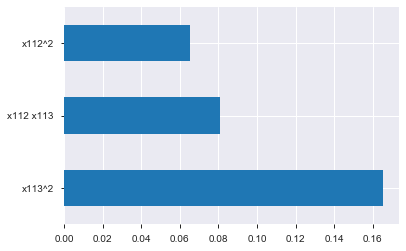

In [69]:
# Выбрать топ 3 признака больше всего влияющие на объемы продаж
import matplotlib.pyplot as plt
%matplotlib inline            

np.sort(forest3.feature_importances_)[::-1]

(pd.Series(np.sort(forest3.feature_importances_), index=X3_poly_feat_names)
   .nlargest(3)
   .plot(kind='barh'))

# NOTE:
# x112^2 - Item_Identifier_cuteg_NCW
# x113^2 - Item_Identifier_cuteg_NCX

In [ ]:
#  Все шаги решения должны сопровождаться подробным описанием полученных результатов и обоснованием
# выбора того или иного шага! За отсутствие описания так же будут снижаться баллы.
# Done